# MNIST Single Layer Network

Note: This notebook is desinged to run with Python3 and GPU runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_gpu.png)

####[MSL-01]
Import modules.

In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import keras
from keras import layers
from keras import models
from keras import initializers
from keras.datasets import mnist

Using TensorFlow backend.


####[MSL-02]
Download the MNIST dataset and store into NumPy arrays.

In [0]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

11493376/11490434 [==============================] - 0s 0us/step


####[MSL-03]
Define a model with a single hidden layer.

In [0]:
model = models.Sequential()
model.add(layers.Dense(1024, activation='tanh', input_shape=(28*28,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', 
                       name='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1024)              803840    
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


####[MSL-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSL-05]
Train the model. It acheves the 97.8% accuracy for the test dataset.

In [0]:
history = model.fit(train_images, train_labels,
                    batch_size=128, epochs=10,
                    validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.3176 - acc: 0.9069 - val_loss: 0.2140 - val_acc: 0.9365
Epoch 2/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1731 - acc: 0.9494 - val_loss: 0.1375 - val_acc: 0.9604
Epoch 3/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.1156 - acc: 0.9661 - val_loss: 0.1107 - val_acc: 0.9673
Epoch 4/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.0838 - acc: 0.9745 - val_loss: 0.0978 - val_acc: 0.9692
Epoch 5/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0619 - acc: 0.9812 - val_loss: 0.0876 - val_acc: 0.9735
Epoch 6/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.0464 - acc: 0.9862 - val_loss: 0.0747 - val_acc: 0.9757
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0

####[MSL-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

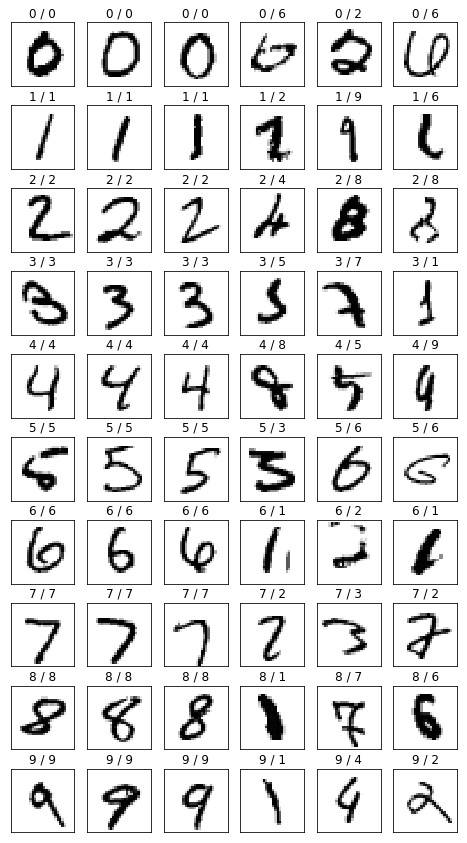

In [0]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
  indices = list(correct[correct['pred']==i].index[:3]) \
              + list(incorrect[incorrect['pred']==i].index[:3])
  for c, image in enumerate(test_images[indices]):
            subplot = fig.add_subplot(10, 6, i*6+c+1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")